# SOURCE STATISTICS

1. [Median, min, max](#gen-stats)

2. [Number of sources per record (graph)](#sources-per-record) 
3.  [Number of records per source (graph)](#records-per-source) 
4. [Records not from OSF preprint list](#not-in-osf) 
5. [Records from two sources](#two-sources)

In [ ]:
import os

# contains the list of preprint source providers listed in https://osf.io/preprints/discover
# we saved this list to a local csv file with the following columns: Source, Other Source Name, Count as of June 11
OSF_PREPRINT_LIST = os.path.join('..', '..', 'data_exploration_results', 'osf_io_preprint_search_sources.csv')
SHARE_FILE = os.path.join('..', '..', 'data', 'share-jan-2019.json')

In [1]:
import json, csv
from collections import defaultdict

# contains the list of preprint source providers listed in https://osf.io/preprints/discover
osf_oi_preprint_sources = set()
with open(OSF_PREPRINT_LIST, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        osf_oi_preprint_sources.add(row['Source'])
        if row['Other Source Name'] != '':
            osf_oi_preprint_sources.add(row['Other Source Name'])

# number of records from each source
# note that a record may come from multiple sources
sources = defaultdict(int)

# number of sources for each record (for computing stats - median, etc)
sources_per_record = []

# number of records from each source, where each record does not come from ANY source from the OSF site above
sources_not_in_osf = defaultdict(int)

# number of records with ANY source from the OSF site above
records_with_sources_not_in_osf = 0

with open(SHARE_FILE) as f:
    for line in f:
        data = json.loads(line)
        
        for source in data['sources']:
            sources[source] += 1
        
        # check if ALL of the record sources are not in the preprint list
        if len(set(data['sources']).intersection(osf_oi_preprint_sources)) == 0:
            not_in_osf = set(data['sources']) - osf_oi_preprint_sources
            for source in not_in_osf:
                sources_not_in_osf[source] += 1
            
            records_with_sources_not_in_osf += 1
            
        sources_per_record.append(len(data['sources']))


## <a id='gen-stats'>GENERAL STATISTICS</a>

In [40]:
import statistics
print('TOTAL NUMBER OF SOURCES: {}'.format(len(sources.keys())))
print('MEDIAN NUMBER OF RECORDS: {}'.format(statistics.median(sources_per_record)))
print('MIN NUMBER OF RECORDS: {}'.format(min(sources_per_record)))
print('MAX NUMBER OF RECORDS: {}'.format(max(sources_per_record)))

TOTAL NUMBER OF SOURCES: 103
MEDIAN NUMBER OF RECORDS: 1
MIN NUMBER OF RECORDS: 1
MAX NUMBER OF RECORDS: 10



## <a id='sources-per-record'>SOURCES PER RECORD</a>

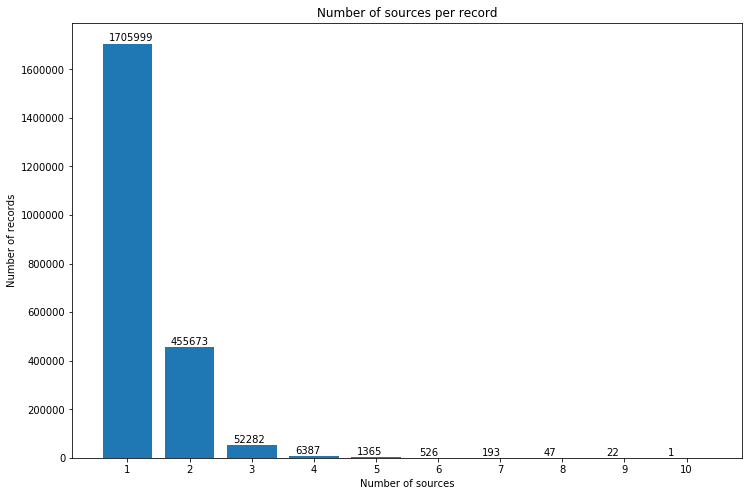

In [26]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

freq, counts = np.unique(np.array(sources_per_record), return_counts = True)
num_ticks = len(freq)

plt.figure(figsize=(12,8))
plt.title('Number of sources per record')
plt.xlabel('Number of sources')
plt.ylabel('Number of records')

plt.bar(range(num_ticks), counts[:num_ticks])
plt.xticks(range(num_ticks), freq[:num_ticks])

for i, v in enumerate(counts[:num_ticks]):
    plt.text(range(num_ticks)[i] - 0.3, v + 10000, str(v))

plt.show()

## <a id='records-per-source'>RECORDS PER SOURCE</a>

In [39]:
import pandas as pd
df = pd.DataFrame(sorted(sources.items(), key = lambda kv : kv[1], reverse = True), \
                  columns = ['Source', 'Records'])

display(df[:30])

,Source,Records
0,arXiv,1317695
1,Research Papers in Economics,799595
2,CrossRef,443621
3,Hyper Articles en Ligne (HAL),73726
4,bioRxiv,31501
5,CERN Document Server,28929
6,DoE's SciTech Connect Database,28137
7,AgEcon Search,16839
8,Preprints.org,8603
9,DataCite MDS,6798


## <a id='not-in-osf'>NOT FROM OSF PREPRINT LIST</a>

In [49]:
print('RECORDS COMING FROM SOURCES NOT IN OSF PREPRINT LIST: {}'.format(records_with_sources_not_in_osf))
print('SOURCES WITH RECORDS NOT IN OSF PREPRINT LIST: {}'.format(len(sources_not_in_osf)))

RECORDS COMING FROM SOURCES NOT IN OSF PREPRINT LIST: 42232
SOURCES WITH RECORDS NOT IN OSF PREPRINT LIST: 37


In [48]:
import pandas as pd
df = pd.DataFrame(sorted(sources_not_in_osf.items(), key = lambda kv : kv[1], reverse = True), \
                  columns = ['Source', 'Records'])

display(df)

,Source,Records
0,Hyper Articles en Ligne (HAL),38710
1,WHOAS at MBLWHOI Library,1278
2,AgEcon Search,1264
3,RCAAP - Repositório Científico de Acesso Abert...,569
4,DataCite MDS,228
5,CrossRef,128
6,Eprints in Library and Information Science,97
7,BITSS,36
8,Calhoun: Institutional Archive of the Naval Po...,17
9,Zenodo,17


## <a id='two-sources'>RECORDS FROM TWO SOURCES</a>

In [55]:
import os, json, csv
from collections import defaultdict

# number of records from each pair of sources
records_per_source_pair = defaultdict(int)

# number of records a particular source shares with exactly one other source
records_per_source = defaultdict(int)

with open(SHARE_FILE) as f:
    for line in f:
        data = json.loads(line)
        
        if len(data['sources']) == 2:
            data['sources'].sort()
            
            records_per_source_pair['--'.join(data['sources'])] += 1
            
            for source in data['sources']:
                records_per_source[source] += 1

In [59]:
import pandas as pd
df = pd.DataFrame(sorted(records_per_source_pair.items(), key = lambda kv : kv[1], reverse = True), \
                  columns = ['Source', 'Records'])

display(df[:30])


,Source,Records
0,CrossRef--arXiv,333396
1,CrossRef--bioRxiv,26946
2,AgEcon Search--Research Papers in Economics,15573
3,CERN Document Server--arXiv,12078
4,Hyper Articles en Ligne (HAL)--arXiv,10152
5,DoE's SciTech Connect Database--arXiv,9180
6,Hyper Articles en Ligne (HAL)--Research Papers...,7180
7,CrossRef--Preprints.org,6040
8,CrossRef--Research Papers in Economics,5230
9,Munich Personal RePEc Archive--Research Papers...,4786


In [60]:
import pandas as pd
df = pd.DataFrame(sorted(records_per_source.items(), key = lambda kv : kv[1], reverse = True), \
                  columns = ['Source', 'Records'])

display(df[:30])

,Source,Records
0,CrossRef,390068
1,arXiv,371159
2,Research Papers in Economics,34772
3,bioRxiv,26968
4,Hyper Articles en Ligne (HAL),17456
5,AgEcon Search,15573
6,CERN Document Server,12079
7,DoE's SciTech Connect Database,9181
8,Preprints.org,6040
9,Munich Personal RePEc Archive,4786
